In [1]:
# Run the tutorial in source directory and keep data in data directory 
# the  cell 1 after this cell  contain neccessary function to generate results
# main code start after this  

In [1]:
from for_radon_inv import *
from hoyer import *

In [4]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
# Load the .mat file
directory="../data/Data_synthetic_with_multiples.mat"
data = loadmat(directory)

print(data.keys())

d=data['D1']
h=data['h']
dt=data['dtsec']

h=np.squeeze(h)
h.shape
type(h)

dict_keys(['__header__', '__version__', '__globals__', 'D1', 'dtsec', 'h'])


numpy.ndarray

In [5]:
import warnings
warnings.filterwarnings('ignore') 
tmax = 1.0 
q = np.linspace(-0.3, 0.8, 60)  
N = 2      
flow = 2   
fhigh = 80 
print(type(d),d.shape[0],"=d")
print(type(q),q.shape[0],"=q")
print(type(h),h.shape,"=h")

<class 'numpy.ndarray'> 1001 =d
<class 'numpy.ndarray'> 60 =q
<class 'numpy.ndarray'> (49,) =h


In [6]:
x_sol_hoyer, final_iter=\
                SD_hoyer_squared_radon(forward_radon_freq,inverse_radon_freq, d, dt, h, q, N, flow, fhigh,\
                0.001,.05,max_iter=1000, tol=1e-6)

In [7]:
nt, nh = d.shape
nq = len(q)
q_cut=0.25
qmin= np.min(q)
qmax=np.max(q)
dq = (qmax-qmin)/(nq-1)

iq_cut = np.floor((q_cut-qmin)/dq)+1;
iq_cut = int(iq_cut) 
print(iq_cut)
mc =x_sol_hoyer.copy() 

#mc[:,0:iq_cut] = 0   # Keep multiples in the Radon panel

mc[0:250,:]=0;
dip=(iq_cut-15)/(nt-250);
for i in range(250,nt):
    mc[i,0:iq_cut-int(dip*(i-250))]=0;
    
#preserved=mc

tau = np.arange(0, nt) * dt
Offset=h
d_pred_hoyer=forward_radon_freq(mc, dt, h, q, N, flow, fhigh)
# prim_syn=d-d_pred_hoyer

30


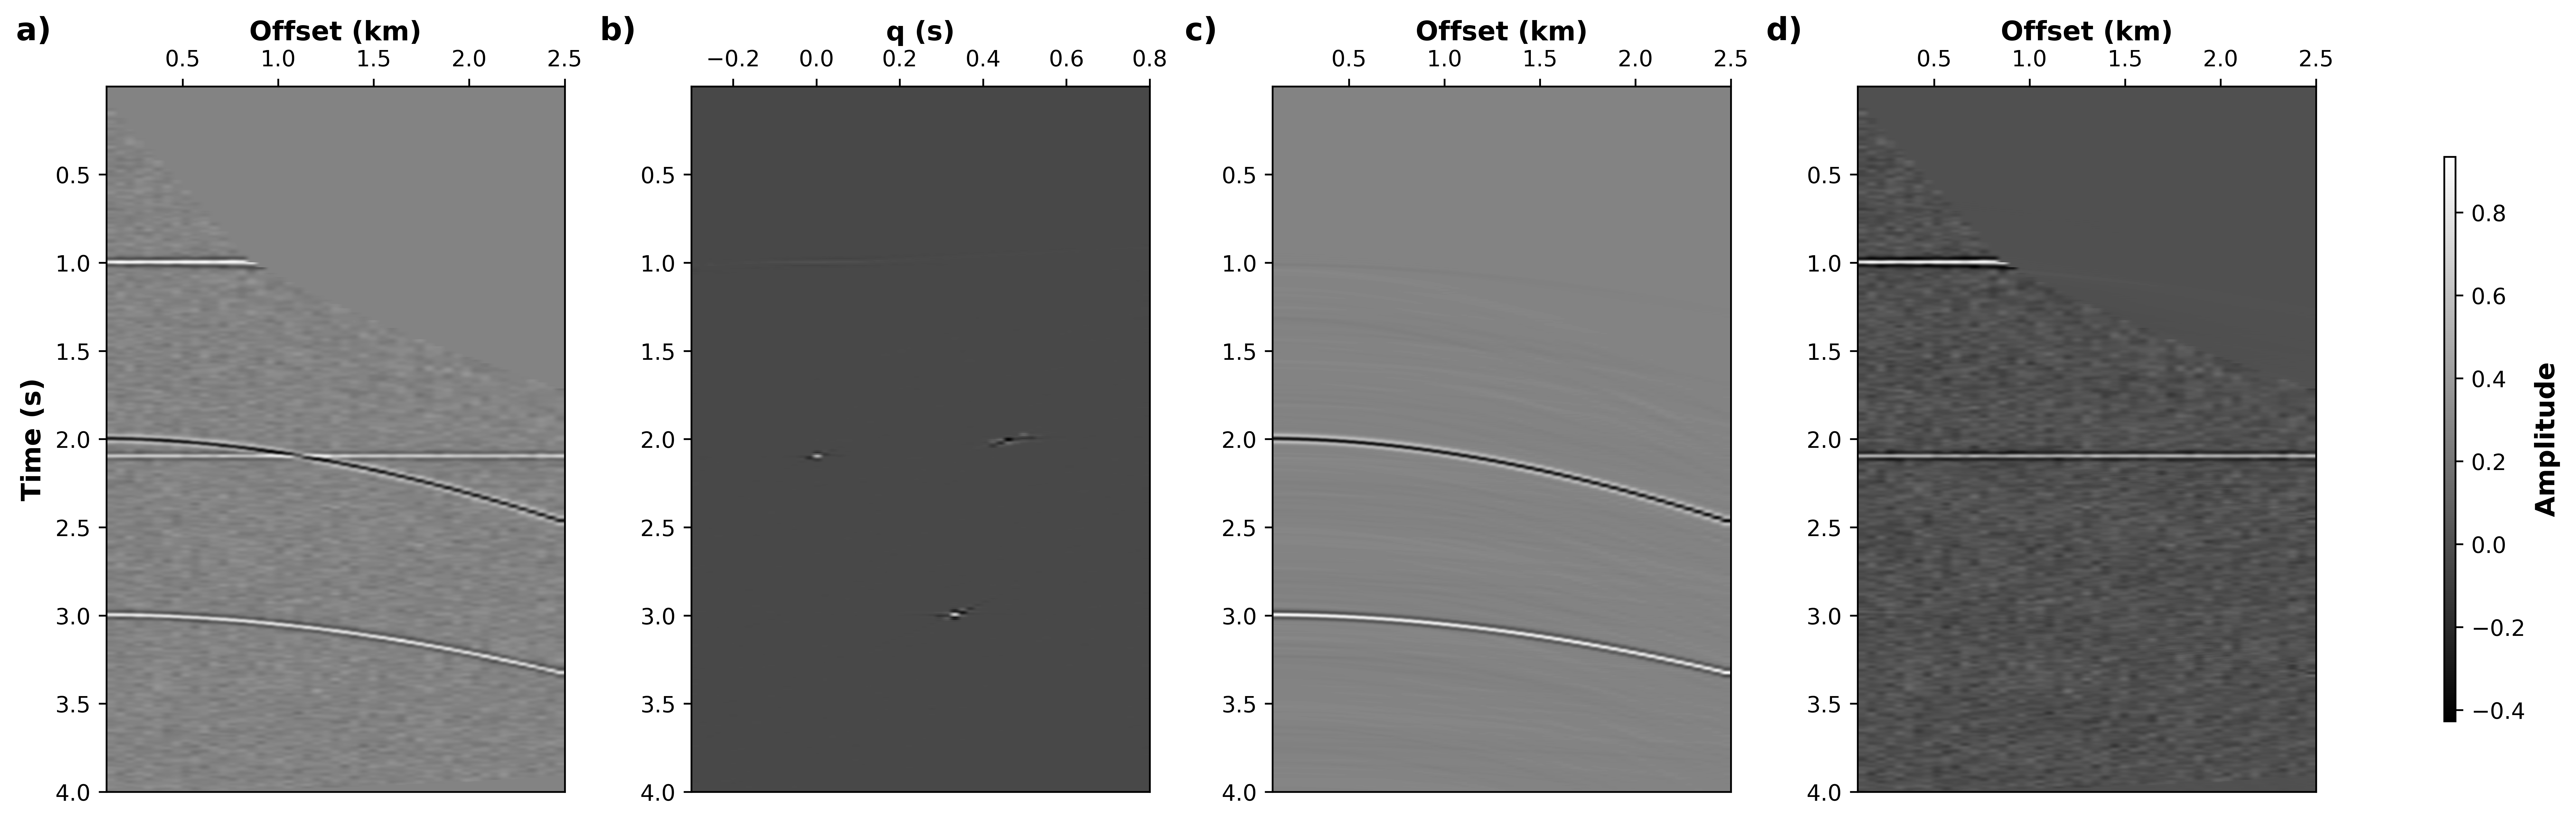

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Create a high-quality figure
fig, axes = plt.subplots(1, 4, figsize=(16, 5), dpi=600, constrained_layout=True)

# Define tick values (adjust based on your data range)

x_ticks_offset = np.linspace(0.5, 2.5, 5)
x_ticks_q = np.linspace(-.2, 0.8, 6)
y_ticks_tau = np.linspace(0.5, np.max(tau), 8)

# Plot True Data
ax = axes[0]
im1 = ax.imshow(d, extent=[np.min(Offset)/1000, np.max(Offset)/1000, np.max(tau), np.min(tau)],
                aspect='auto', origin='upper', cmap='gray')
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()
ax.set_xlabel('Offset (km)', fontsize=12, fontweight='bold')
ax.set_ylabel('Time (s)', fontsize=12, fontweight='bold')
ax.set_xticks(x_ticks_offset)
ax.set_yticks(y_ticks_tau)
# Place label "a)" to the left (negative x) and at the top of the axes
ax.text(-0.12, 1.1, 'a)', transform=ax.transAxes, fontsize=14, fontweight='bold',
        ha='right', va='top', color='black')

# Plot Predicted Model
ax = axes[1]
im2 = ax.imshow(x_sol_hoyer, extent=[np.min(q), np.max(q), np.max(tau), np.min(tau)],
                aspect='auto', origin='upper', cmap='gray')
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()
ax.set_xlabel('q (s)', fontsize=12, fontweight='bold')
ax.set_xticks(x_ticks_q)
ax.set_yticks(y_ticks_tau)
ax.text(-0.12, 1.1, 'b)', transform=ax.transAxes, fontsize=14, fontweight='bold',
        ha='right', va='top', color='black')

# Plot Predicted Multiples
ax = axes[2]
im3 = ax.imshow(d_pred_hoyer, extent=[np.min(Offset)/1000, np.max(Offset)/1000, np.max(tau), np.min(tau)],
                aspect='auto', origin='upper', cmap='gray')
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()
ax.set_xlabel('Offset (km)', fontsize=12, fontweight='bold')
ax.set_xticks(x_ticks_offset)
ax.set_yticks(y_ticks_tau)
ax.text(-0.12, 1.1, 'c)', transform=ax.transAxes, fontsize=14, fontweight='bold',
        ha='right', va='top', color='black')

# Plot Predicted Primaries
ax = axes[3]
im4 = ax.imshow(d - d_pred_hoyer, extent=[np.min(Offset)/1000, np.max(Offset)/1000, np.max(tau), np.min(tau)],
                aspect='auto', origin='upper', cmap='gray')
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()
ax.set_xlabel('Offset (km)', fontsize=12, fontweight='bold')
ax.set_xticks(x_ticks_offset)
ax.set_yticks(y_ticks_tau)
ax.text(-0.12, 1.1, 'd)', transform=ax.transAxes, fontsize=14, fontweight='bold',
        ha='right', va='top', color='black')

# Add a single colorbar to the last subplot
cbar = fig.colorbar(im4, ax=axes, location='right', aspect=50, shrink=0.8)
cbar.set_label("Amplitude", fontsize=12, fontweight='bold')

import os

# Define the directory path
save_dir = '../results/multiple_supression/'

# Create the directory if it does not exist
os.makedirs(save_dir, exist_ok=True)

# Define the full file path
dirt = os.path.join(save_dir, 'seismic_SD_gray_synthetic.pdf')

# Save high-quality grayscale image
plt.savefig(dirt, dpi=600, bbox_inches='tight')
plt.show()
